# YOLOv5 Multi Task Learning Model for Damaged Building Opening Detection

This notebook is based on YOLOv5 by [Ultralytics](https://github.com/ultralytics/yolov5) and modified to train on Damaged Building Opening Dataset.

This notebook covers:

* [Training YOLOv5 MTL](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset): combination of detection and segmentation on damaged building opening data
* Model performance evaluation and comparation for three different YOLOv5 MTL model architecture.


This notebook was created with Google Colab. Maintained by [Ali Surojaya](https://www.linkedin.com/in/ali-surojaya/).

# Setup
Pull in respective libraries to prepare the notebook environment

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=56946aba7c3bfc032d1d8ef29d4a14a942a1fa755a7fd185f333a041b259e22b
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Gen RAM Free: 12.5 GB  | Proc size: 95.6 MB
GPU RAM Free: 15101MB | Used: 0MB | Util   0% | Total 15360MB


In [ ]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 24.1MB/s]

100%|██████████| 14.9M/14.9M [00:01<00:00, 9.80MB/s]

100%|██████████| 42.4M/42.4M [00:02<00:00, 18.3MB/s]

100%|██████████| 91.9M/91.9M [00:04<00:00, 21.0MB/s]

100%|██████████| 170M/170M [00:07<00:00, 22.5MB/s]



# Load Dataset

In [ ]:
%cd {HOME}/yolov5

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="Rnx8swqplWLxxSWCU3Tr")
# project = rf.workspace("thesis-ybkfi").project("damaged-building-openings")
# dataset = project.version(2).download("yolov5")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Rnx8swqplWLxxSWCU3Tr")
project = rf.workspace("thesis-ybkfi").project("damaged-building-opening")
dataset = project.version(3).download("yolov5")

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 365.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 390.7 kB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=2110b455fa5a18e26394d6da7d8a999c00a0ae411a33f75c13f4a20b03de56d1
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstall

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to damaged-building-opening-3 in yolov5pytorch:: 100%|██████████| 3552/3552 [00:01<00:00, 2578.12it/s]


In [ ]:
%cat {dataset.location}/data.yaml

names:
- opening
nc: 1
roboflow:
  license: CC BY 4.0
  project: damaged-building-opening
  url: https://universe.roboflow.com/thesis-ybkfi/damaged-building-opening/dataset/3
  version: 3
  workspace: thesis-ybkfi
test: ../test/images
train: damaged-building-opening-3/train/images
val: damaged-building-opening-3/valid/images


# Train On Damaged Building Opening Dataset 🎉
Here, we train three different architecture of YOLOv5 MTL model on damaged building opening dataset.

## YOLOv5s Model Architecture

/content/yolov5
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/damaged-building-opening-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=yolov5s-mtl-openings, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl

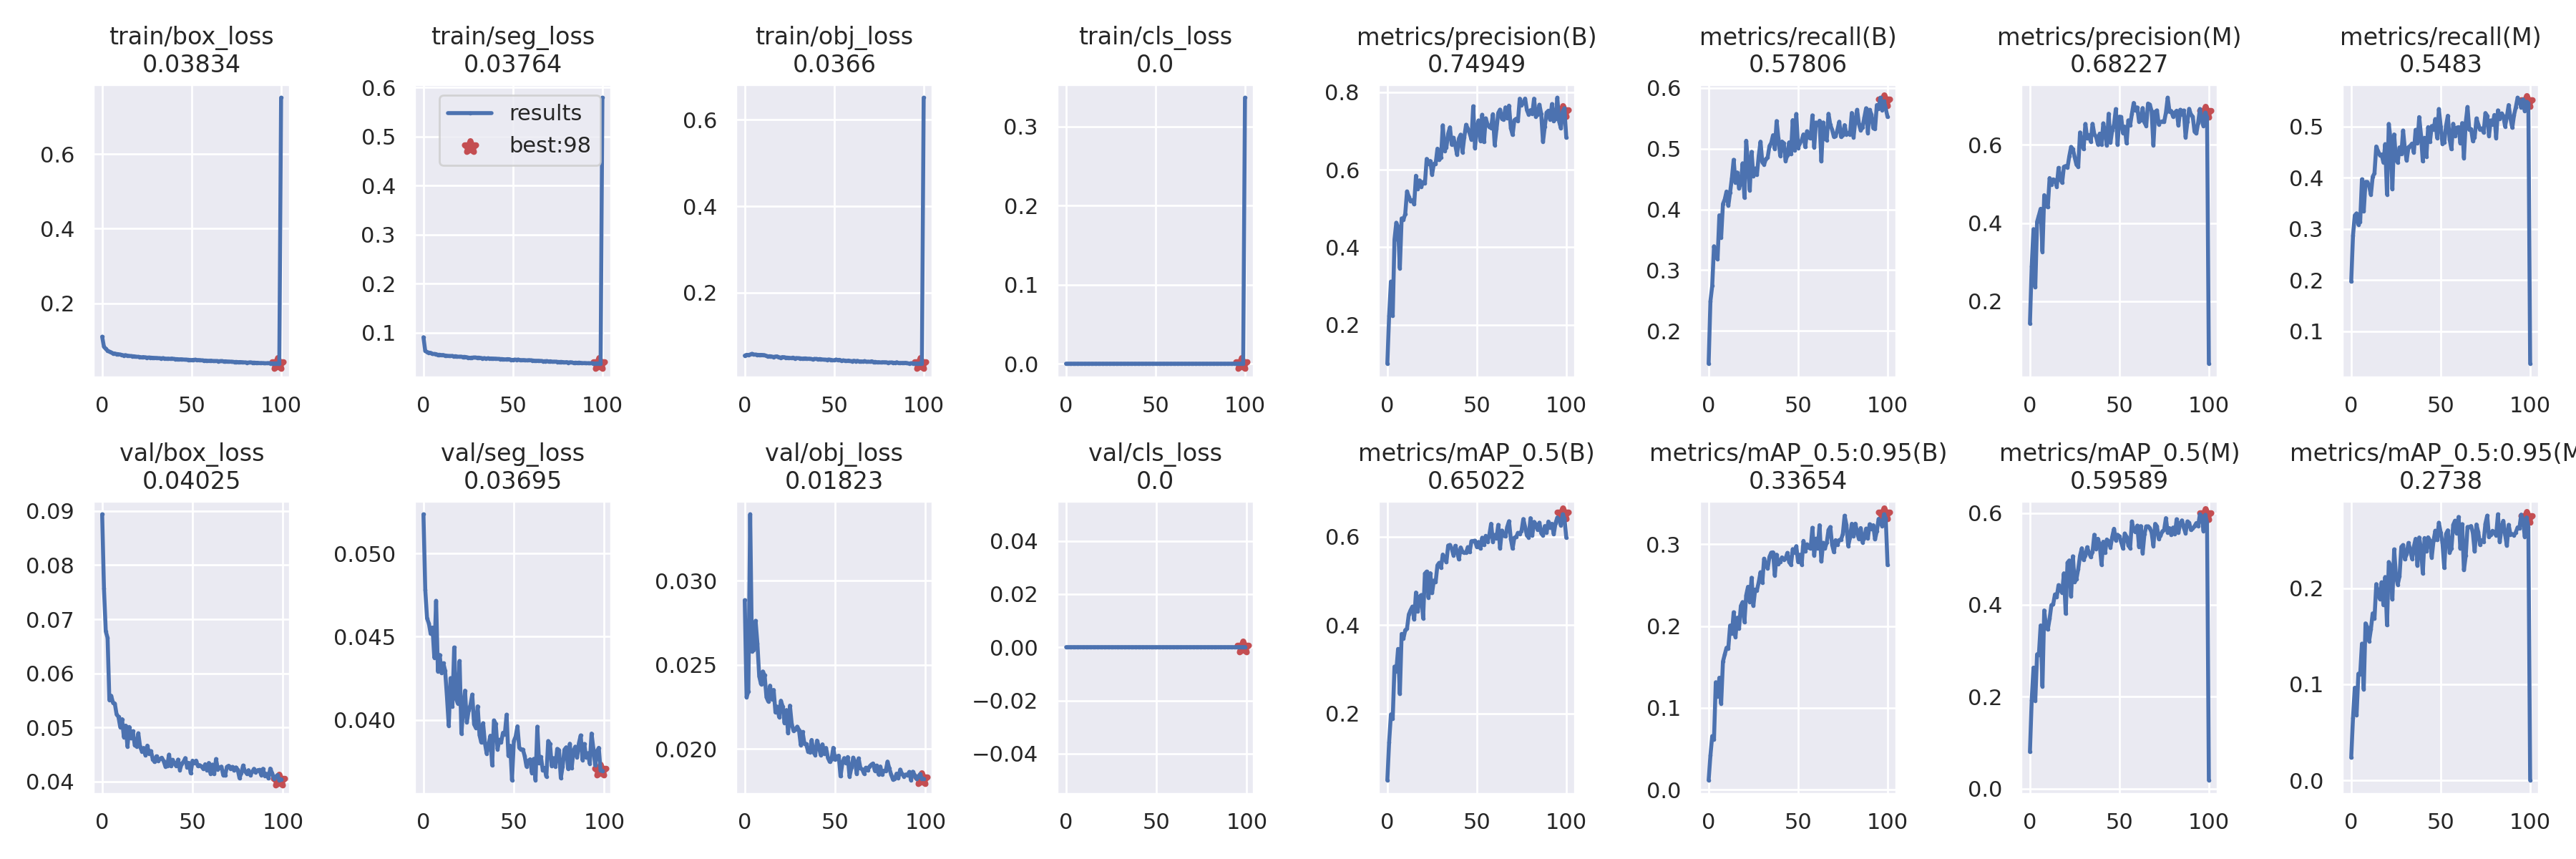

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 640 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name yolov5s-mtl-openings
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/yolov5s-mtl-openings/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/yolov5s-mtl-openings/weights/best.pt --data {dataset.location}/data.yaml --img 640  --name yolov5s-mtl-openings

/content/yolov5
segment/val: data=/content/yolov5/damaged-building-opening-3/data.yaml, weights=['/content/yolov5/runs/train-seg/yolov5s-mtl-openings/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=yolov5s-mtl-openings, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/damaged-building-opening-3/valid/labels.cache... 148 images, 0 backgrounds, 0 corrupt: 100% 148/148 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 5/5 [00:20<00:00,  4.07s/it]
                   all        1

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/yolov5s-mtl-openings/weights/best.pt'], source=/content/yolov5/damaged-building-opening-3/test/images/damaged-818_jpg.rf.01965c5d6b118913fee840d90f88faca.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5s-mtl-openings, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/damaged-building-opening-3/test/images/damaged-818_jpg.rf.01965c5d6b118913fee840d90f88faca.jpg: 320x320 3 openings, 6.4ms
Spe

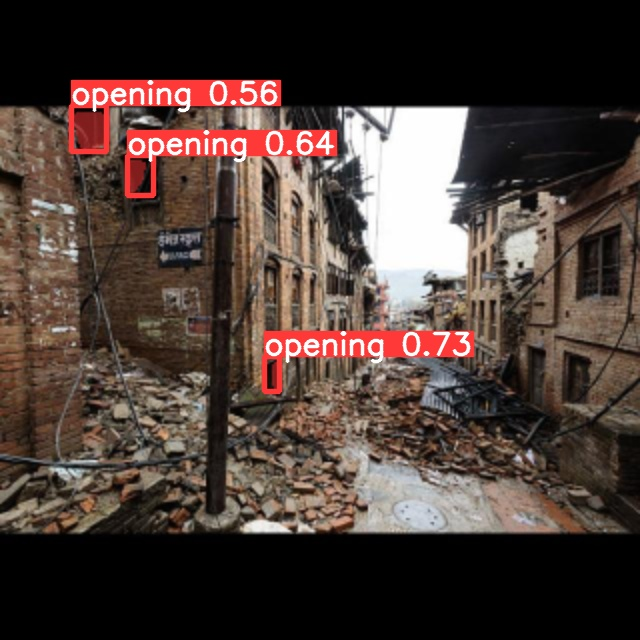

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/yolov5s-mtl-openings/weights/best.pt --source {example_image_path} --name yolov5s-mtl-openings
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/yolov5s-mtl-openings/{example_image_name}", width=600)

In [ ]:
!python segment/predict.py --weights runs/train-seg/yolov5s-mtl-openings/weights/best.pt --img 640 --source {dataset.location}/test/images --name yolov5s-mtl-openings

segment/predict: weights=['runs/train-seg/yolov5s-mtl-openings/weights/best.pt'], source=/content/yolov5/damaged-building-opening-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5s-mtl-openings, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/74 /content/yolov5/damaged-building-opening-3/test/images/damaged-1.rf.9952e7f8f6424dfbc1caf07227e3e45a.jpg: 640x640 2 openings, 14.8ms
image 2/74 /content/yolov5/damaged-building-opening-3/test/images/damaged-106_jpg.rf.e65840c1db

The image above shows the resulting prediction overlayed on the input image.

### Download the best model

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train-seg/custom-dataset/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Save Directory to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r "/content/yolov5/runs" "/content/drive/MyDrive/YOLOv5/runs_260523"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## YOLOv5m Model Architecture

/content/yolov5
segment/train: weights=yolov5m-seg.pt, cfg=segment/yolov5m-seg.yaml, data=/content/yolov5/damaged-building-opening-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=yolov5m-mtl-openings, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou

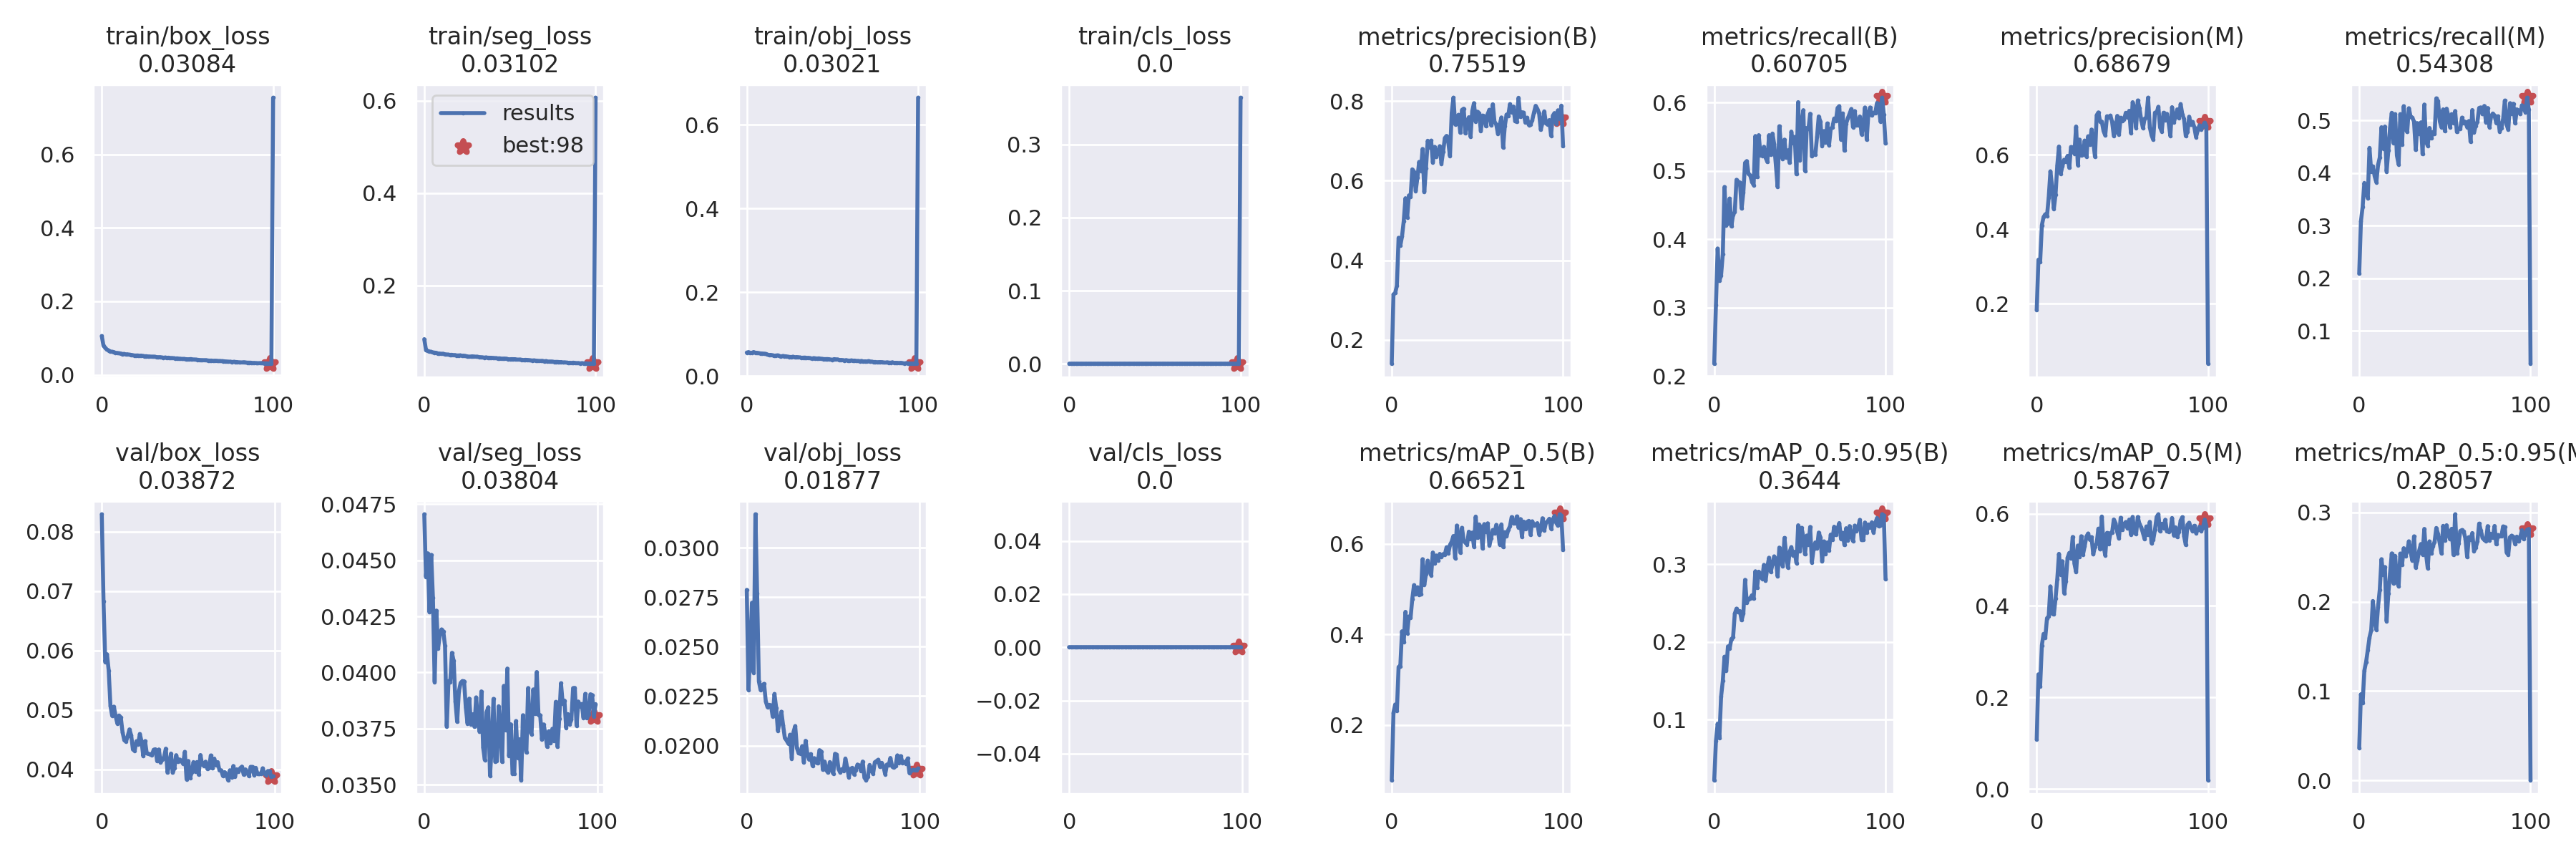

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 640 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5m-seg.pt --name yolov5m-mtl-openings --cfg segment/yolov5m-seg.yaml
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/yolov5m-mtl-openings/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/yolov5m-mtl-openings/weights/best.pt --data {dataset.location}/data.yaml --img 640  --name yolov5m-mtl-openings

/content/yolov5
segment/val: data=/content/yolov5/damaged-building-opening-3/data.yaml, weights=['/content/yolov5/runs/train-seg/yolov5m-mtl-openings/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=yolov5m-mtl-openings, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m-seg summary: 220 layers, 21652358 parameters, 0 gradients, 69.8 GFLOPs
val: Scanning /content/yolov5/damaged-building-opening-3/valid/labels.cache... 148 images, 0 backgrounds, 0 corrupt: 100% 148/148 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 5/5 [00:16<00:00,  3.34s/it]
                   all  

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/yolov5m-mtl-openings/weights/best.pt'], source=/content/yolov5/damaged-building-opening-3/test/images/damaged-818_jpg.rf.01965c5d6b118913fee840d90f88faca.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5m-mtl-openings, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m-seg summary: 220 layers, 21652358 parameters, 0 gradients, 69.8 GFLOPs
image 1/1 /content/yolov5/damaged-building-opening-3/test/images/damaged-818_jpg.rf.01965c5d6b118913fee840d90f88faca.jpg: 320x320 3 openings, 13

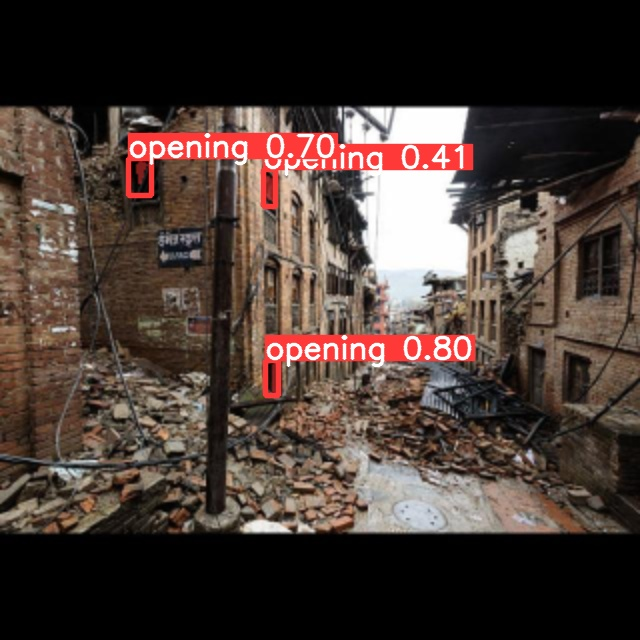

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/yolov5m-mtl-openings/weights/best.pt --source {example_image_path} --name yolov5m-mtl-openings
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/yolov5m-mtl-openings/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.

### Download the best model

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train-seg/yolov5m-mtl-openings/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Save Directory to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r "/content/yolov5/runs" "/content/drive/MyDrive/YOLOv5/runs_260523_dataver3"

Mounted at /content/drive


## YOLOv5l Model Architecture

/content/yolov5
segment/train: weights=yolov5l-seg.pt, cfg=segment/yolov5l-seg.yaml, data=/content/yolov5/damaged-building-opening-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=yolov5l-mtl-openings, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou

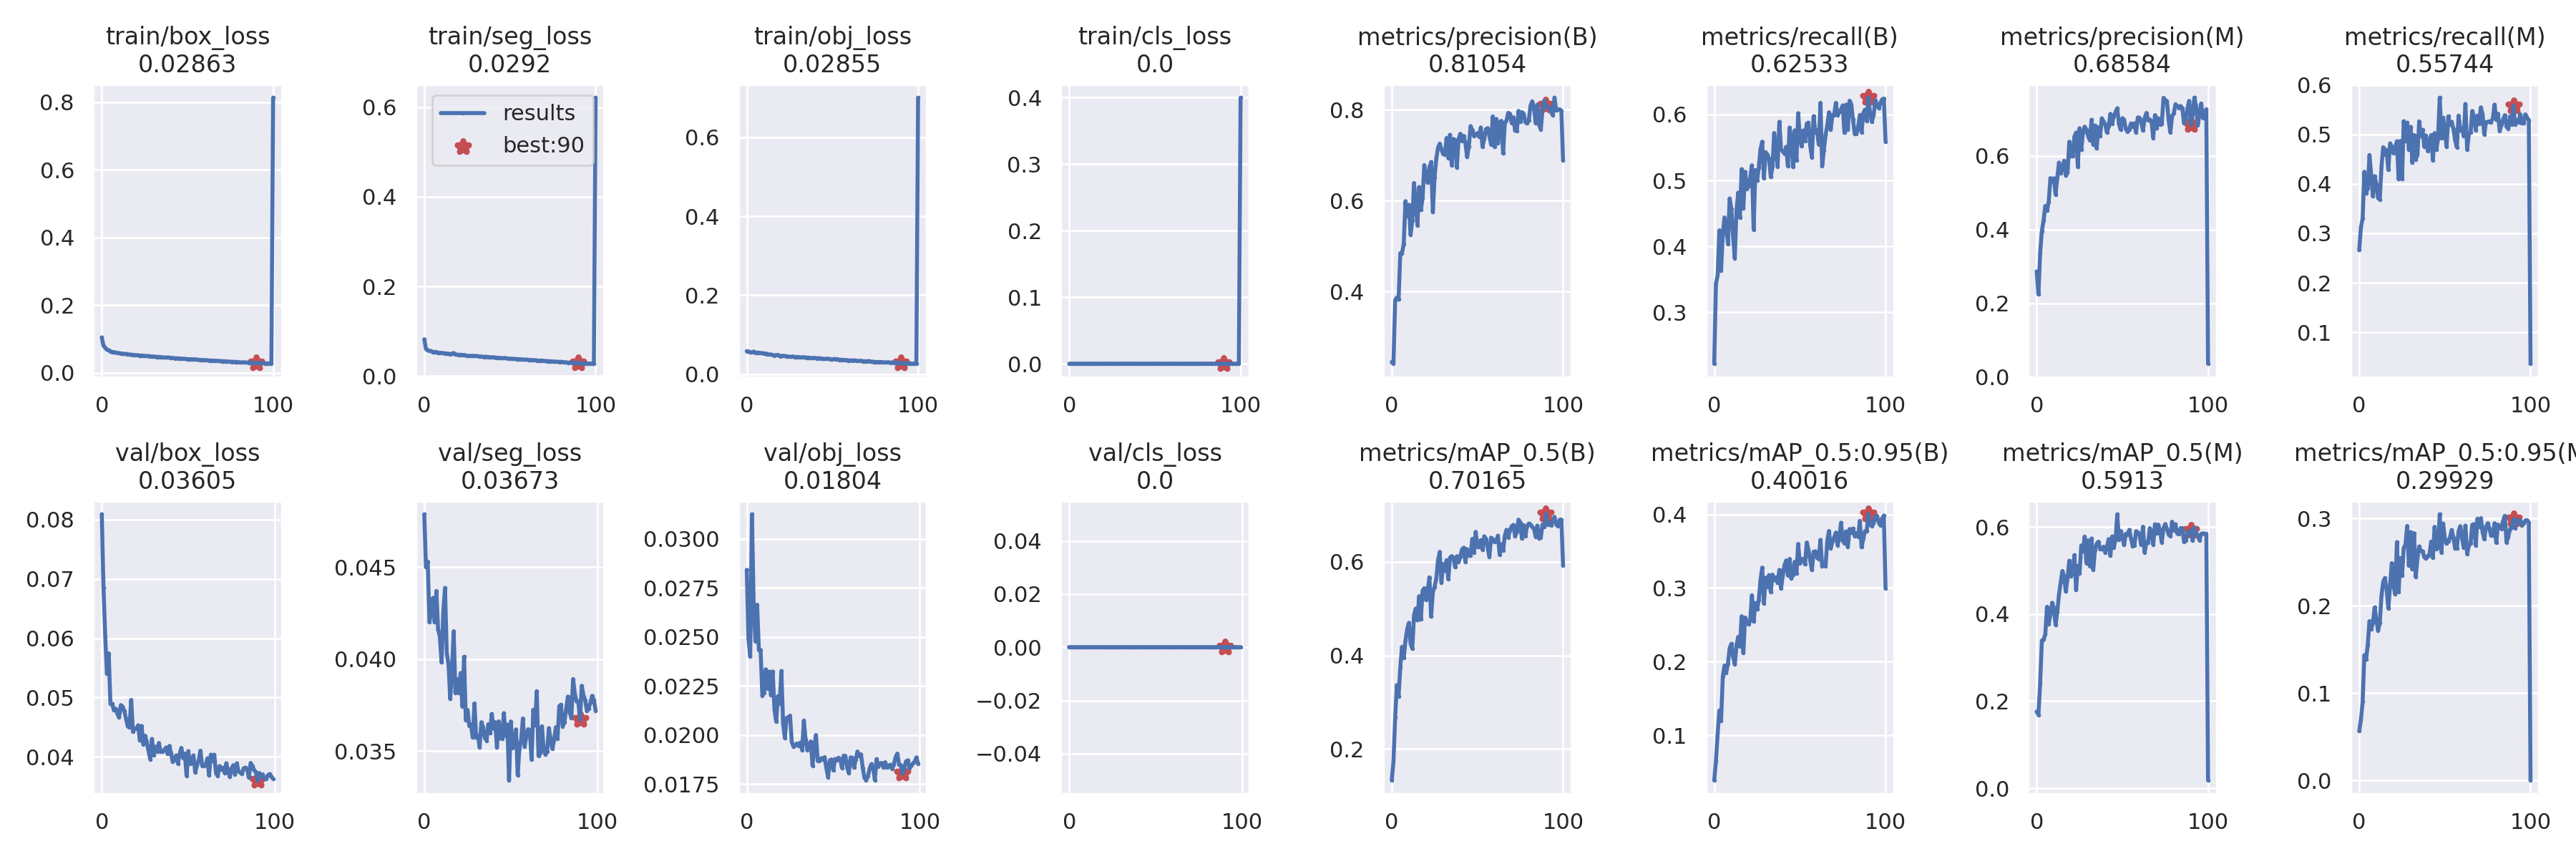

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 640 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5l-seg.pt --cfg segment/yolov5l-seg.yaml --name yolov5l-mtl-openings
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/yolov5l-mtl-openings/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/yolov5l-mtl-openings/weights/best.pt --data {dataset.location}/data.yaml --img 640  --name yolov5l-mtl-openings

/content/yolov5
segment/val: data=/content/yolov5/damaged-building-opening-3/data.yaml, weights=['/content/yolov5/runs/train-seg/yolov5l-mtl-openings/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=yolov5l-mtl-openings, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l-seg summary: 275 layers, 47468982 parameters, 0 gradients, 146.4 GFLOPs
val: Scanning /content/yolov5/damaged-building-opening-3/valid/labels.cache... 148 images, 0 backgrounds, 0 corrupt: 100% 148/148 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 5/5 [00:18<00:00,  3.69s/it]
                   all 

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/yolov5l-mtl-openings/weights/best.pt'], source=/content/yolov5/damaged-building-opening-3/test/images/damaged-715_jpg.rf.ec30ddbdc7f9d72197e2936c37435f54.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5l-mtl-openings, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l-seg summary: 275 layers, 47468982 parameters, 0 gradients, 146.4 GFLOPs
image 1/1 /content/yolov5/damaged-building-opening-3/test/images/damaged-715_jpg.rf.ec30ddbdc7f9d72197e2936c37435f54.jpg: 320x320 4 openings, 2

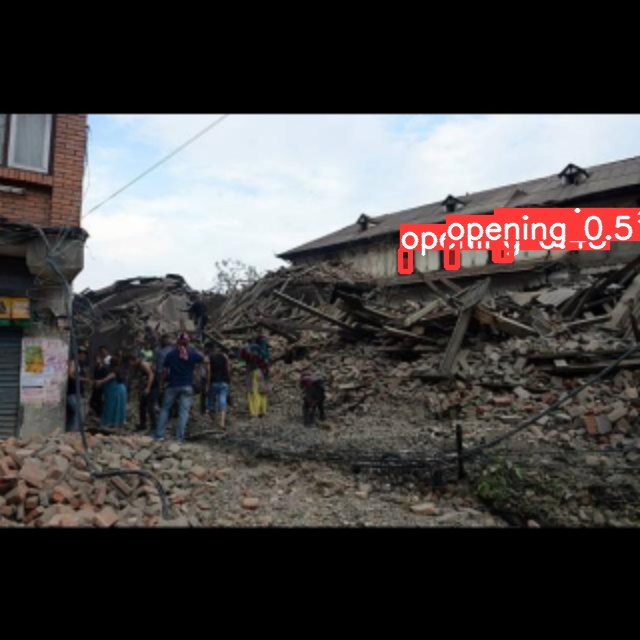

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/yolov5l-mtl-openings/weights/best.pt --source {example_image_path} --name yolov5l-mtl-openings
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/yolov5l-mtl-openings/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.

In [ ]:
!python segment/predict.py --weights runs/train-seg/yolov5l-mtl-openings/weights/best.pt --img 640 --source {dataset.location}/test/images --name yolov5l-mtl-openings

segment/predict: weights=['runs/train-seg/yolov5l-mtl-openings/weights/best.pt'], source=/content/yolov5/damaged-building-opening-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5l-mtl-openings, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l-seg summary: 275 layers, 47468982 parameters, 0 gradients, 146.4 GFLOPs
image 1/74 /content/yolov5/damaged-building-opening-3/test/images/damaged-1.rf.9952e7f8f6424dfbc1caf07227e3e45a.jpg: 640x640 2 openings, 56.9ms
image 2/74 /content/yolov5/damaged-building-opening-3/test/images/damaged-106_jpg.rf.e6

### Download the best model

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train-seg/yolov5l-mtl-openings/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Save Directory to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r "/content/yolov5/runs" "/content/drive/MyDrive/YOLOv5/runs_270523"

Inference on test data

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "../example_images"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_links = [
    "https://i.imgur.com/rFsDnHC.jpg",
    "https://i.imgur.com/aEcceXm.jpg",
    "https://i.imgur.com/s4N63fx.jpg",
    ]

for i,link in enumerate(image_links):
  img_data = requests.get(link).content
  with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
    handler.write(img_data)

In [ ]:
#Infer On Directory
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v6.2-149-g77dcf55 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/3 /content/example_images/example_0.jpg: 320x320 1 L, 1 Y, 8.2ms
image 2/3 /content/example_images/example_1.jpg: 320x320 1 G, 1 I, 8.7ms
image 3/3 /content/example_images/example_2.jpg: 320x320 1 H, 6.9ms
Speed: 0.3ms pre-process, 8.0ms inference, 1.0ms NMS per image at shape (1, 3, 320, 32

In [ ]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.8

for i,txt_file in enumerate(os.listdir("runs/predict-seg/exp3/labels")):
  with open(os.path.join("runs/predict-seg/exp3/labels",txt_file), 'r') as fid:
    for line in fid:
      label, x1, y1, x2, y2, conf = line.split(" ")
      conf = float(conf)
      if conf < MIN_CONF_THRESHOLD:
        print(f"Image has a low confidence prediction, uploading to project: example_{i}.jpg")
        #Upload via Roboflow pip package
        project.upload(os.path.join(example_image_dir,f'example_{i}.jpg'))
        break

Image has a low confidence prediction, uploading to project: example_0.jpg
Image has a low confidence prediction, uploading to project: example_1.jpg
Image has a low confidence prediction, uploading to project: example_2.jpg


# Hyperparameter Evolution

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 640 --batch 16 --epochs 10 --data {dataset.location}/data.yaml --weights '/content/drive/MyDrive/YOLOv5/runs_260523/runs/train-seg/yolov5s-mtl-openings/weights/best.pt' --name yolov5s-mtl-hypevolve --evolve

/content/yolov5
segment/train: weights=/content/drive/MyDrive/YOLOv5/runs_260523/runs/train-seg/yolov5s-mtl-openings/weights/best.pt, cfg=, data=/content/yolov5/damaged-building-opening-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=300, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=yolov5s-mtl-hypevolve, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-174-g5eb7f7d Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, b

In [ ]:
# Save to Drive

!cp -r "/content/yolov5/runs" "/content/drive/MyDrive/YOLOv5/runs_010623"

# Predict on Video


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python segment/predict.py --weights /content/drive/MyDrive/YOLOv5/runs_260523/runs/train-seg/yolov5s-mtl-openings/weights/best.pt --source /content/drive/MyDrive/YOLOv5/clip.mp4

segment/predict: weights=['/content/drive/MyDrive/YOLOv5/runs_260523/runs/train-seg/yolov5s-mtl-openings/weights/best.pt'], source=/content/drive/MyDrive/YOLOv5/clip.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
video 1/1 (1/1329) /content/drive/MyDrive/YOLOv5/clip.mp4: 384x640 2 openings, 47.5ms
video 1/1 (2/1329) /content/drive/MyDrive/YOLOv5/clip.mp4: 384x640 1 opening, 10.8ms
video 1/1 (3/1329) /content/drive/MyDrive/YOLOv5/clip.mp4: 

In [ ]:
!python segment/predict.py --weights /content/drive/MyDrive/YOLOv5/runs_260523/runs/train-seg/yolov5s-mtl-openings/weights/best.pt --source /content/drive/MyDrive/YOLOv5/clip1.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (2522/7519) /content/drive/MyDrive/YOLOv5/clip1.mp4: 384x640 (no detections), 5.6ms
video 1/1 (2523/7519) /content/drive/MyDrive/YOLOv5/clip1.mp4: 384x640 (no detections), 5.6ms
video 1/1 (2524/7519) /content/drive/MyDrive/YOLOv5/clip1.mp4: 384x640 (no detections), 5.6ms
video 1/1 (2525/7519) /content/drive/MyDrive/YOLOv5/clip1.mp4: 384x640 (no detections), 6.2ms
video 1/1 (2526/7519) /content/drive/MyDrive/YOLOv5/clip1.mp4: 384x640 (no detections), 5.5ms
video 1/1 (2527/7519) /content/drive/MyDrive/YOLOv5/clip1.mp4: 384x640 (no detections), 5.5ms
video 1/1 (2528/7519) /content/drive/MyDrive/YOLOv5/clip1.mp4: 384x640 (no detections), 5.5ms
video 1/1 (2529/7519) /content/drive/MyDrive/YOLOv5/clip1.mp4: 384x640 (no detections), 5.5ms
video 1/1 (2530/7519) /content/drive/MyDrive/YOLOv5/clip1.mp4: 384x640 (no detections), 8.4ms
video 1/1 (2531/7519) /content/drive/MyDrive/YOLOv5/clip1.mp4: 384x640 (no detections), 5.5ms
video 1/1

In [ ]:
!python segment/predict.py --weights /content/drive/MyDrive/YOLOv5/runs_260523/runs/train-seg/yolov5s-mtl-openings/weights/best.pt --source /content/drive/MyDrive/YOLOv5/clip2.mp4

segment/predict: weights=['/content/drive/MyDrive/YOLOv5/runs_260523/runs/train-seg/yolov5s-mtl-openings/weights/best.pt'], source=/content/drive/MyDrive/YOLOv5/clip2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
video 1/1 (1/1351) /content/drive/MyDrive/YOLOv5/clip2.mp4: 384x640 (no detections), 43.9ms
video 1/1 (2/1351) /content/drive/MyDrive/YOLOv5/clip2.mp4: 384x640 (no detections), 9.8ms
video 1/1 (3/1351) /content/drive/MyDrive/YOLO